![article](article.jpg)

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Dayana Navarro Valencia </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Agos 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/DayanaNavarro/Laboratorio-1-Inversi-n-de-Capital'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión de Capital  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3> Se presentará un caso donde se tiene un 1'000,000 de pesos para invertir y por un lado, tenemos una inversión pasiva comprando el 100% del capital de títulos de un ETF y por le otro lado tenemos una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo. Se analizará las dos estrategias y se hará una comparación para saber que es lo que más conviene.
    </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

En este siguiente notebook se presentará la resolución de un problema donde se tiene un capital de 1'000,000 de pesos y se analizaran dos estrategias de inversión una pasiva y otra activa, donde compararemos estas dos inversiones para saber cual nos convendría más aplicar. Todo esto se hará con los datos del ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. 

Una inversión de pasiva es un enfoque de inversión a largo plazo con el objetivo de crear rendimientos gradualmente a la largo del tiempo, mientras que la inversión activa no sigue los movimientos del mercado de valores, sino que compra acciones cuyo valor puede subir en un futuro cercano para generar ganancias.

El más conocido de los mercados de renta variable es el NAFTRAC, que se encarga de replicar el rendimiento del índice S&P/BMV IPC, estos tipos de instrumentos se utilizan estrategicamente para aprovechar las alzas y las bajas del mercado.



# <font color= #6B6B6B> <font size = 6> 1.Objetivos </font>

<br> Poder responder la pregunta ¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?

- Comparando los dos tipos de inversiones

- Encontrando las medidas de desempeño

- Analizando los rendimientos 


# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

pip install yfinance --upgrade --no-cache-dir

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0


## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/prices.csv : Precios históricos


## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import time
from os.path import isfile, join
from os import listdir, path
from datetime import date
import matplotlib.pyplot as plt
import functions as fn
import data as dt
import yfinance as yf
import glob
import pandas_datareader.data as web
from scipy.optimize import minimize

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

Los archivos con los que trabajamos son tipo .csv que son 31 diferentes archivos, cuyas columnas son:

- Ticker

- Nombre

- Clase de activo

- Peso (%)

- Precio

- Acciones 

- Valor de mercado

- Valor Nominal

- Sector

- ISIN

- Bolsa de Valores

- Ubicación 

- Moneda 

- Mercado de divisas

- Tipo de cambio

Los nombres de los Ticker se tienen que corregir para que a la hora de usar yahoo finance no haya problema y además quitar asteriscos u otros simbolos que no deban de estar ahí.

Además de eliminar los Tickers que no se repitan en todos los csv y dejar solo los nombres que si estan en todos para trabajar con ellos.

Para esto se concatenaron los csv para poder contar cuentas acciones se repetían en cada uno


In [3]:
path = "files"
  
file = glob.glob(path + "/*.csv")
  
data_frame = pd.DataFrame()
content = []

for filename in file:
    df = pd.read_csv(filename,skiprows=2,header=None,index_col=None).dropna()
    content.append(df)
    
data_frame = pd.concat(content)

df = data_frame.rename(columns = {0:"Ticker", 3:'Peso %', 4:'Precio'})



In [4]:
a=df['Ticker'].value_counts()
a

PE&OLES*      31
BBAJIOO       31
MEGACPO       31
PINFRA*       31
KOFUBL        31
ALFAA         31
ASURB         31
CUERVO*       31
AC*           31
GMEXICOB      31
OMAB          31
ELEKTRA*      31
GRUMAB        31
MXN           31
BOLSAA        31
GAPB          31
GFNORTEO      31
LIVEPOLC.1    31
ALSEA*        31
GCARSOA1      31
WALMEX*       31
LABB          31
GFINBURO      31
CEMEXCPO      31
ORBIA*        31
AMXL          31
TLEVISACPO    31
BIMBOA        31
FEMSAUBD      31
KIMBERA       31
Q*            28
VESTA*        28
GCC*          26
RA            25
SITESB.1      18
IENOVA*       16
GENTERA*      14
VOLARA        11
BSMXB          8
SITES1A-1      5
NMKA           3
ALPEKA         3
USD            2
Name: Ticker, dtype: int64

De acuerdo a nuestra función value_counts() los elementos que tenemos que borrar porque no se repiten en todos los csv son: 
+ 'USD'
+ 'ALPEKA'
+ 'NMKA'
+ 'VOLARA'
+ 'BSMXB'
+ GENTERA*'
+ 'IENOVA*'
+ 'SITESB.1'
+ 'RA'
+ 'GCC*'
+ 'Q*'
+ 'VESTA*'
+ 'SITES1A-1'

# <font color= #6B6B6B> CASO </font>

<hr style="border:0.02in solid gray"> </hr>

**Caso:** Tienes 1 Millón de pesos, tienes dos opciones para invertirlos. Por un lado, puedes hacer una Inversión Pasiva del capital, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo por medio de un algoritmo en específico.

<br>

# <font color= #6B6B6B> 4. INVERSION PASIVA  </font>

<hr style="border:0.02in solid gray"> </hr>

> Para la inversión pasiva, llamamos a todos los files, ponemos esos files en una data, definimos las fechas de los csv y definimos los tickers que vamos a usar

In [34]:
# Capital inicial
c_0=1000000

# % comision

com=0.00125

In [35]:
path = "files"

In [48]:
files=fn.f_files(path)

In [54]:
data_files=fn.data(files)

In [57]:
data_dates=fn.f_dates()

In [59]:
data_tickers=fn.f_tickers()

<hr style="border:0.02in solid gray"> </hr>

 > # <font color= #6B6B6B> 4.1. Dataframes Inversión Pasiva </font>

> Se descargan los datos de YahooFinance y se guardan en un archivo csv con el nombre de prices.csv, para no estar corriendo el Yfinance que me tardaba mucho en cargar

In [61]:
Data_down=fn.f_down_data().head()
Data_down

,Date,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,FEMSAUBD.MX,GAPB.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,KIMBERA.MX,KOFUBL.MX,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,MXN=X,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
0,2020-01-31,107.120003,14.19,45.825001,15.695,363.149994,31.205000,33.805000,43.439999,7.595,34.900002,1382.750000,170.255005,233.854996,67.980003,21.424999,116.129997,50.215000,200.794998,39.060001,115.180000,22.350000,99.714996,70.680000,18.780800,143.755005,44.410000,197.339996,204.115005,41.965000,55.220001
1,2020-02-04,108.879997,14.18,45.849998,15.990,365.799988,31.315001,34.285000,43.349998,7.945,35.919998,1380.150024,174.264999,238.964996,69.175003,22.600000,116.355003,54.080002,204.214996,38.970001,117.449997,22.450001,98.184998,71.044998,18.814400,144.490005,46.755001,199.929993,204.395004,42.320000,56.625000
2,2020-02-05,107.470001,14.04,46.240002,15.890,372.700012,31.200001,33.980000,42.840000,7.750,35.830002,1376.229980,175.539993,240.220001,66.750000,22.240000,116.070000,53.330002,203.369995,38.880001,118.019997,22.110001,96.519997,72.879997,18.671289,144.050003,46.869999,196.190002,202.759995,40.950001,56.119999
3,2020-02-06,107.620003,13.66,46.099998,15.680,369.670013,31.129999,33.130001,43.270000,7.750,34.639999,1364.000000,175.880005,240.020004,65.800003,21.400000,116.160004,52.400002,203.000000,38.950001,119.000000,21.900000,93.820000,70.730003,18.587601,145.020004,46.470001,193.059998,204.080002,40.369999,55.209999
4,2020-02-07,107.610001,13.36,45.200001,15.640,366.769989,30.740000,33.169998,43.009998,7.790,33.820000,1390.989990,176.240005,242.000000,65.959999,22.040001,113.989998,51.840000,204.000000,38.590000,120.290001,20.959999,94.000000,71.949997,18.639700,144.059998,46.110001,193.199997,202.669998,40.029999,56.000000


> Se realiza el filtro de fechas para solo tener los datos de las fechas que necesitamos, pasamos de tener las fechas diarias a tener las fechas mensuales

In [66]:
Data_sort=fn.f_sortdates(Data_down,data_dates)

> Se filtran tickers para que estan en orden alfabético, ya que así es como los descarga Yfinance

In [68]:
Precios_sort=fn.f_prices(data_files)

> Definimos los pesos

In [70]:
Pesos_1=fn.f_pesos()

> Lo siguinte es un dataframe que muestra el precio de los Ticker en el primer mes, así como sus titulos que puede comprar, capital, postura y comisiones que representa cada transacción. En este Dataframe se hizo manual el drop de los tickers que no se repetían en todos los csv.

In [707]:
pasiva= fn.f_df2(Precios_sort,Pesos_1,Data_sort,c_0,com)
pasiva

,Ticker,Peso %,Precio,Titulos,Capital,Postura,Comisiones
0,AC.MX,1.77,107.120003,16502.0,1769903.90,3.132730e+06,2209.62
1,ALFAA.MX,1.51,14.190000,106280.0,1509998.30,2.280097e+06,1885.14
2,ALSEA.MX,0.86,45.825001,18743.0,859971.61,7.395756e+05,1073.62
3,AMXL.MX,13.70,15.695000,871799.0,13699988.65,1.876898e+08,17103.61
4,ASURB.MX,2.75,363.149994,7563.0,2749936.53,7.562325e+06,3433.13
5,BBAJIOO.MX,0.83,31.205000,26565.0,829997.02,6.888975e+05,1036.20
6,BIMBOA.MX,1.87,33.805000,55248.0,1869993.23,3.496887e+06,2334.57
7,BOLSAA.MX,0.72,43.439999,16553.0,719961.13,5.183720e+05,898.83
8,CEMEXCPO.MX,4.30,7.595000,565455.0,4299998.89,1.849000e+07,5368.29
9,CUERVO.MX,0.67,34.900002,19173.0,669974.15,4.488827e+05,836.42


## RENDIMIENTO Y RENDIMIENTO ACUMULADO

> Se muestra otro dataframe con los rendimientos y rendimientos acumulados que como sabemos:

> - Rentabilidad simple = (Valor final de inversión – Valor inicial de la inversión) / Valor inicial de la inversión

> - Rentabilidad acumulada =  suma de rendimientos individuales



In [709]:
rends = fn.rend(data_dates,pasiva).dropna()
rends

,Date,Capital,Rend,Rend Acum
0,2020-01-31,1769903.90,0.000000,0.000000
1,2020-02-28,1509998.30,-0.146847,-0.146847
2,2020-03-31,859971.61,-0.430482,-0.577329
3,2020-04-30,13699988.65,14.930745,14.353416
4,2020-05-29,2749936.53,-0.799275,13.554142
5,2020-06-30,829997.02,-0.698176,12.855966
6,2020-07-31,1869993.23,1.253012,14.108978
7,2020-08-31,719961.13,-0.614993,13.493985
8,2020-09-30,4299998.89,4.972543,18.466528
9,2020-10-30,669974.15,-0.844192,17.622336


> La obtención del cash de los activos que eliminamos

In [75]:
cash=((100-pasiva['Peso %'].values.sum())/100)*c_0
cash

43900.000000000146

> Sumatoria de las comisiones

In [78]:
comisiones= (pasiva['Comisiones']*10).sum()
comisiones

11908.900000000001

### CONLUSIÓN PASIVA

> En este portafolio podemos observar buenos rendimientos además de que a veces, es mejor y más eficiente participar en inversiones pasivas que correr por el mercado para obtener ganancias momentáneas. Y el componente más importante es el tiempo. Durante un largo período de tiempo, los cambios del mercado no afectan tanto al resultado final: cuanto más tiempo permanezca el inversor en la inversión, menor es el riesgo de obtener un mal resultado.

# <font color= #6B6B6B> 5. Inversión Activa:Portafolio eficiente  </font>

> El portafolio eficiente es aquel que tiene un mínimo riesgo, para un retorno dado o, equivalentemente un portafolio con un máximo retorno para un nivel de riesgo dado.

<hr style="border:0.02in solid gray"> </hr>

> Seleccionamos los tickers

In [82]:
tickers= pasiva.iloc[:,0]
tickers= tickers.to_list()

> Llamamos de nuevo los datos diarios descargados de yahoo

In [83]:
Data_down=fn.f_down_data()

> Nuevo data frame con la cantidad de datos a trabajar, que serían de 31-01-2020 al 31-01-2021

In [84]:
Data_activ=fn.f_down_data().iloc[0:251,:].set_index('Date')

> Media y Volatilidad de los activos

In [93]:
ret_sum= fn.portafolio(Data_activ)
ret_sum

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,FEMSAUBD.MX,GAPB.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,KIMBERA.MX,KOFUBL.MX,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,MXN=X,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
Media,99.609781,12.836853,24.198944,14.451295,272.782272,21.416653,38.306633,44.427410,7.501614,41.257032,1289.135456,142.883466,178.781474,50.244064,17.622968,87.992570,59.330677,229.206394,34.945637,95.913526,20.49259,64.765040,67.824562,21.583865,107.484203,37.092291,273.789960,166.757350,29.688964,55.606534
Volatilidad,28.238185,4.838074,56.091316,0.715876,1977.798148,21.464087,18.884151,13.347848,4.691553,38.141915,6454.192054,231.149368,1158.250985,58.739907,5.374182,310.260782,186.031049,545.978481,3.421680,69.295527,3.16683,143.066639,17.065529,2.677688,361.782650,37.915837,5923.298497,206.245951,23.318603,7.468221


> PROCESO PARA CONOCER EL PORTAFOLIO EFICIENTE


In [117]:
corr = Data_activ.corr()
rf = 0.085

> Construir la frontera de mínima varianza

In [96]:
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza Sigma = S.dot(corr).dot(S)

S= np.diag(ret_su.loc['Volatilidad'].values)
Sigma = S.dot(corr).dot(S)

# 2. Eind: rendimientos esperados activos individuales

Eind = ret_su.loc['Media'].values


In [100]:
# Número de activos

N= len(Eind)

# Dato inicial

w0=np.ones(N) / N

# Cuotas de las variables

bnds = ((0,1),)*N

# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)


In [102]:
minvar = minimize(fn.var(w, Sigma), w0, args=(Sigma,),bounds=bnds, constraints=cons)

In [103]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza

w_minvar = minvar.x
E_minvar =Eind.T.dot(w_minvar)
s_minvar = var(w_minvar, Sigma)**0.5
RS_minvar= (E_minvar - rf) / s_minvar


> Encontrar el portafolio que maximiza el radio de Sharpe (EMV)

In [104]:
# Número de activos

N= len(Eind)

# Dato inicial

w0=np.ones(N) / N

# Cotas de las variables

bnds = ((0,1),)*N

# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [691]:
emv = minimize(fn.menos_RS(w,Eind, rf, Sigma), w0, args=(Eind,rf,Sigma),bounds=bnds, constraints=cons)

In [106]:
# Pesos, rendimiento y riesgo del portafolio EMV:MÁXIMO SR
w_emv = emv.x
E_emv= Eind.T.dot(w_emv)
s_emv = var(w_emv,Sigma)**0.5
RS_emv = (E_emv - rf)/s_emv
w_emv,E_emv,s_emv,RS_emv

(array([5.73134721e-03, 6.81006164e-02, 6.33496516e-03, 1.09490698e-05,
        4.89477255e-05, 1.05068895e-05, 6.91479404e-03, 1.88033631e-02,
        1.10996291e-05, 2.78799337e-03, 1.73336472e-05, 1.76245781e-05,
        3.44564351e-06, 8.15183460e-06, 1.08265229e-05, 1.49520530e-04,
        1.30239976e-05, 1.50121344e-04, 3.48226027e-02, 1.23251888e-04,
        1.07927691e-05, 3.37683353e-03, 1.54630782e-02, 8.14695940e-01,
        3.98535418e-06, 1.05940121e-05, 7.16134376e-05, 2.50652790e-04,
        2.23514468e-02, 1.44039822e-02]),
 24.50940257277701,
 0.8800510102352851,
 27.75339416546667)

In [107]:
#Covarianza de los datos
cov_emv_minvar = w_emv.T.dot(Sigma).dot(w_minvar)
cov_emv_minvar

64.92534567854874

In [108]:
# Correlacion de los datos

corr_emv_minvar = cov_emv_minvar /(s_emv*s_minvar)
corr_emv_minvar 

0.272078798145581

In [128]:
# Vector de w

w_p = np.linspace(0,1)


> Tabla de media, Volatilida y RS

In [132]:
frontera1=fn.frontera1(w_p,E_emv,E_minvar,s_emv,s_minvar,cov_emv_minvar,rf)
frontera1.head()

,Media,Vol,RS
0,120.264336,36761.519387,0.003269
1,118.310154,35277.676055,0.003351
2,116.355971,33824.400481,0.003437
3,114.401789,32401.692665,0.003528
4,112.447607,31009.552608,0.003623


> Gráfica de dispersión de puntos coloreando de acuerdo a SR, y portafolio EMV

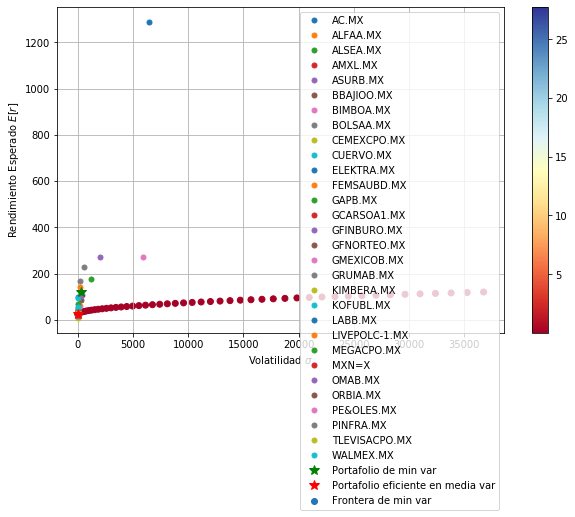

In [316]:
grafica1=fn.grafica1(frontera1,ret_sum,s_minvar,E_minvar,s_emv, E_emv)
grafica1

> Ahora, dibujamos la LAC, combinando el portafolio EMV con el activo libre de riesgo:

In [317]:
sp = np.linspace(0,0.2)

In [320]:
LAC1=fn.LAC1(sp,RS_emv,rf)
LAC1

,Vol,Media
0,0.000000,0.085000
1,0.004082,0.198279
2,0.008163,0.311558
3,0.012245,0.424837
4,0.016327,0.538117


> La gráfica de LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.

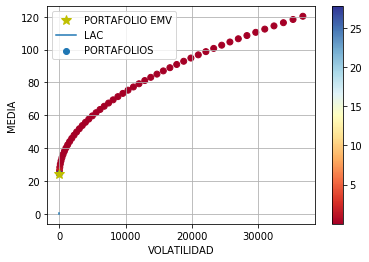

In [323]:
grafica2=fn.grafica2(frontera1,s_emv,E_emv,LAC1)
grafica2

> Combinación óptima de acuerdo a preferencias: Con los datos anteriores, y la caracterización de aversión al riesgo, se escoge la combinación óptima entre el portafolio EMV y el activo libre de riesgo

In [324]:
g=8
w_opt =(E_emv-rf)/(g*s_emv**2)
w_opt

3.9420149858765985

> Recomendaciones finales de inversión

In [351]:
optimo=w_opt *w_emv, w_opt + (1-w_emv), 1-w_opt
optimo

(array([2.25930566e-02, 2.68453650e-01, 2.49725276e-02, 4.31613971e-05,
        1.92952668e-04, 4.14183157e-05, 2.72582217e-02, 7.41231391e-02,
        4.37549044e-05, 1.09903116e-02, 6.83294970e-05, 6.94763508e-05,
        1.35827784e-05, 3.21346542e-05, 4.26783155e-05, 5.89412169e-04,
        5.13407938e-05, 5.91780589e-04, 1.37271222e-01, 4.85860789e-04,
        4.25452577e-05, 1.33115284e-02, 6.09556859e-02, 3.21154361e+00,
        1.57103259e-05, 4.17617545e-05, 2.82301244e-04, 9.88077053e-04,
        8.81097382e-02, 5.67807136e-02]),
 array([4.93628364, 4.87391437, 4.93568002, 4.94200404, 4.94196604,
        4.94200448, 4.93510019, 4.92321162, 4.94200389, 4.93922699,
        4.94199765, 4.94199736, 4.94201154, 4.94200683, 4.94200416,
        4.94186547, 4.94200196, 4.94186486, 4.90719238, 4.94189173,
        4.94200419, 4.93863815, 4.92655191, 4.12731905, 4.942011  ,
        4.94200439, 4.94194337, 4.94176433, 4.91966354, 4.927611  ]),
 -2.9420149858765985)

In [353]:
max_sharpe = fn.frontera1.iloc[frontera['RS'].idxmax()]
max_sharpe

Media    24.509403
Vol       0.880051
RS       27.753394
Name: 49, dtype: float64

<hr style="border:0.02in solid gray"> </hr>

> DataFrame del portafolio eficiente, con los pesos del RS

In [148]:
prices_post1 = Data_activ.loc[Data_activ.index >= '2021-01-29',:]
lista = prices_post1.index.values

capital = (1000000 - cash)

In [167]:
portafolio_1=fn.portafolio1(tickers,prices_post1,Data_activ,pasiva,w_emv,capital,com)
portafolio_1

,Precios,Peso,Postura,Titulos,Comisiones
Ticker,,,,,
AC.MX,93.070000,0.005731,5479.74,58.0,6.75
ALFAA.MX,12.900000,0.068101,65111.00,5047.0,81.38
ALSEA.MX,23.110001,0.006335,6056.86,262.0,7.57
AMXL.MX,13.670000,0.000011,10.47,0.0,0.00
ASURB.MX,322.529999,0.000049,46.80,0.0,0.00
BBAJIOO.MX,24.760000,0.000011,10.05,0.0,0.00
BIMBOA.MX,38.520000,0.006915,6611.23,171.0,8.23
BOLSAA.MX,46.000000,0.018803,17977.90,390.0,22.42
CEMEXCPO.MX,11.760000,0.000011,10.61,0.0,0.00


In [162]:
# Restar comisiones 
cash = cash - portfolio_1["Comisiones"].sum()
cash

42688.360000000146

### CONLUSIÓN PORTAFOLIO EFICIENTE

> La frontera de mínima varianza es el lugar geométrico de los portafolios que proveen el mínimo riesgo para un nivel de rendimiento dado. Si logramos encontrar dos portafolios sobre la frontera, entonces podemos a la vez encontrar todas las posibles combinaciones de estos dos portafolios para trazar la frontera de mínima varianza. Portafolio de EMV: máximo SR y Portafolio de mínima varianza.

>Los inversionistas pueden tener restricciones adicionales:

1. Restricciones en posiciones.
        
2. Pueden requerir un rendimiento mínimo.

Todo lo anterior se puede incluir como restricciones en el problema de optimización, y puede ser llevado a cabo a costa de un cociente de Sharpe menor.


> Críticas a la optimización media varianza
1. Solo importan medias y varianzas: recordar que la varianza subestima el riesgo en algunos casos.
2. Preferencias media-varianza tratan las ganancias y pérdidas simétricamente: el sentimiento de insatisfacción de una perdida es mayor al sentimiento de satisfacción de una ganancia (aversión a pérdidas).
3. La aversión al riesgo es constante: la actitud frente al riesgo puede cambiar, por ejemplo con el estado de la economía.
4. Horizonte corto (un periodo).
5. Datos erróneos entra - Datos errónes salen: la optimización media varianza es supremamente sensible a las entradas: estimaciones de rendimientos esperados y varianzas.

# <font color= #6B6B6B> 5.1 Dataframes Inversión Activa  </font>

> Generamos los nuevo datos de estudio

In [469]:
Data_activ1=f_down_data().iloc[251:].set_index('Date')

> Generamos las fechas de este periodo y encontramos los cambios de los precios

In [466]:
datesaño2=data_dates[12:]
cambio1= Data_activ1.pct_change()
cambio2= cambio1.dropna().reset_index()
cambio2=cambio2[cambio2.Date.isin (datesaño2)].reset_index(drop=True).set_index('Date')
cambio3=cambio2.reset_index(drop=True)

> En la siguiente tabla se hizo lo siguiente, no tenía muy claro porque cuando baja vendo y cuando sube compro, pero intente realizar el código como me hacía más sentido:

**VENTA**

- Los **Titulos_antV** son lso titulos antes de la venta, los titulos anteriores
- Los **Titulos_V** son con un for, en mi len(cambio2) donde mi cambio2 es el cambio en los precios, entonces lo que ese for pretende hacer es que en cada cambio me diga si subio o bajo de acuerdo a los rebalanceos de 5% y los guarda en una lista. De ahi con un if, si el cambio en tickers esta down(bajo) vende, entonces se lo resta a los **Titulos_antV**.
- La **Venta** entonces es la diferencia de esos titulos por el precio
- Las **Comisiones venta** son el resultado de la multiplicación de la Venta por la comision definida al inicio.

**COMPRA**

- Los **Titulos_antC** de acuerdo a mi lógica serían los titulos **Titulos_V**, ya que esos titulos que vendí serían los que estarían disponibles para la compra.
- Los **Titulos_C** son con el for anterior que igual recorre len(cambio2) que es el cambio en los precios, entonces lo que ese for pretende hacer es que en cada cambio me diga si subio o bajo de acuerdo a los rebalanceos de 5% y los guarda en una lista. De ahi con un if, si el cambio en tickers esta  up(arriba) compra, entonces se lo suma a los **Titulos_C**.
- La **Compras** entonces es la diferencia de esos titulos por el precio
- Las **Comisiones compra** son el resultado de la multiplicación de las Compras por la comision definida al inicio.

**CAPITAL**

- De acuerdo a mi lógica, lo fui guardando, primero como *dinero_venta* que eso es: mi cash ya definido más la **Venta** menos la suma de **Comisiones venta**  y ese *dinero_venta*  es lo que gane de vender.
- Y ya que tengo ese dinero de la venta ahora si puedo comprar que sería el *dinero_compra*, que es igual al dinero_venta pero con **Compras** más las **Comisiones compra**
- Y por ultimo **Capital** que quedaría después de esas transacciones sería mi cash más esos **Titulos_C** por el precio

> Esto sería más o menos lo que tenía de idea, no sé si es lo correcto o si lo logré plasmar pero esta era la idea


In [722]:
inversion_activa=fn.activa(tickers,Data_activ1,portafolio_1,cambio2,cash,com)
inversion_activa

,Precio,Titulos_antV,Titulos_V,Ventas,Comisiones venta,Titulos_antC,Titulos_C,Compras,Comisiones compra,Capital
Ticker,,,,,,,,,,
AC.MX,121.489998,58.0,56.550,176.16,0.220200,56.550,57.963750,171.76,0.214700,49730.375864
ALFAA.MX,14.420000,5047.0,4920.825,1819.44,2.274300,4920.825,5043.845625,1773.96,2.217450,115420.614297
ALSEA.MX,40.860001,262.0,255.450,267.63,0.334537,255.450,261.836250,260.94,0.326175,53386.989335
AMXL.MX,19.030001,0.0,0.000,0.00,0.000000,0.000,0.000000,-0.00,-0.000000,42688.360000
ASURB.MX,399.940002,0.0,0.000,0.00,0.000000,0.000,0.000000,-0.00,-0.000000,42688.360000
BBAJIOO.MX,40.970001,0.0,0.000,0.00,0.000000,0.000,0.000000,-0.00,-0.000000,42688.360000
BIMBOA.MX,60.540001,171.0,166.725,258.81,0.323513,166.725,170.893125,252.34,0.315425,53034.229944
BOLSAA.MX,34.669998,390.0,380.250,338.03,0.422537,380.250,389.756250,329.58,0.411975,56201.208474
CEMEXCPO.MX,12.430000,0.0,0.000,0.00,0.000000,0.000,0.000000,-0.00,-0.000000,42688.360000


## RENDIMIENTO Y RENDIMIENTO ACUMULADO

> Se muestra otro dataframe con los rendimientos y rendimientos acumulados de la inversióna activa:

> - Rentabilidad simple = (Valor final de inversión – Valor inicial de la inversión) / Valor inicial de la inversión

> - Rentabilidad acumulada =  suma de rendimientos individuales

In [634]:
rends_activa=fn.rend_activa(datesaño2,inversion_activa)
rends_activa

,Date,Capital,Rend,Rend Acum
0,2021-01-29,49730.375864,0.000000,0.000000
1,2021-02-26,115420.614297,1.320928,1.320928
2,2021-03-31,53386.989335,-0.537457,0.783471
3,2021-04-30,42688.360000,-0.200398,0.583073
4,2021-05-31,42688.360000,0.000000,0.583073
5,2021-06-30,42688.360000,0.000000,0.583073
6,2021-07-30,53034.229944,0.242358,0.825431
7,2021-08-31,56201.208474,0.059716,0.885147
8,2021-09-30,42688.360000,-0.240437,0.644710
9,2021-10-26,45511.994134,0.066145,0.710855


## HISTORICOS DE OPERACIONES

> Para esta tabla de histórico de operaciones, se realizo lo siguiente, de acuerdo a las requisiciones de laboritario debía de tener titulos totales, comisiciones totales y acumuladas, lo que hice fue que con los datos del dataframe inversión activa arriba hecho, multilique esos **Titulos_V** y **Titulos_C** por el precio y sume esos resultados para obtener **Titulos Totales**.

> Y para las comisiones igual multiplique las **Ventas** y **Compras** por la com que ya teniamos definida arriba y eso lo sume para obtener **Comisiones**.

> Y por último **Comisiones acumuladas**, fue el resultado de aplicarle a **Comisiones** un **cumsum()** que lo que hace es retornar las sumas acumuladas de los elementos.

In [639]:
hist_opera=fn.historico(datesaño2,inversion_activa,com)
hist_opera

,Date,Titulos Venta,Titulos Compra,Titulos Totales,Comision Venta,Comision Compra,Comisiones,Comisiones acumuladas
0,2021-01-29,6870.259379,7042.015864,13912.275243,0.220200,0.214700,0.434900,0.434900
1,2021-02-26,70958.296875,72732.254297,143690.551173,2.274300,2.217450,4.491750,4.926650
2,2021-03-31,10437.687156,10698.629335,21136.316491,0.334537,0.326175,0.660713,5.587362
3,2021-04-30,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,5.587362
4,2021-05-31,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,5.587362
5,2021-06-30,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,5.587362
6,2021-07-30,10093.531653,10345.869944,20439.401597,0.323513,0.315425,0.638938,6.226300
7,2021-08-31,13183.266804,13512.848474,26696.115278,0.422537,0.411975,0.834512,7.060812
8,2021-09-30,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,7.060812
9,2021-10-26,2754.765009,2823.634134,5578.399143,0.088300,0.086088,0.174388,7.235200


## Conclusión Activa

> La compra y venta de ETF puede ser más barata que la negociación de acciones y puede haber más liquidez. Aquí tomamos como referencia un índice particular pero que se puede elegir a conveniencia y por lo tanto es flexible, aquí lo que buscamos es la posibilidad de tomar oportunidades que se presentan en el corto plazo, pero no seguimos los movimientos del mercado sino que vendemos y compramos acciones para generar ganancias. Nos centramos entonces en obtener un mejor rendimiento del mercado en comparación con un índice medio de referencia en particular. El objetivo es "ganar" el mercado o superar el índice.



# <font color= #6B6B6B> <font size = 6> 6. Results </font>

<hr style="border:0.02in solid gray"> </hr>

## MEDIDAS DE DESEMPEÑO

In [717]:
medidasDesemp=fn.medidas(rends,rends_activa)
medidasDesemp

,Medidas,Descripcion,Inv_pasiva,Inv_activa
0,rend_m,Rendimiento Promedio Mensual,0.011806,0.067768
1,rend_c,Rendimiento mensual acumulado,0.220090,0.705312


<hr style="border:0.02in solid gray"> </hr>

## CONCLUSIÓN GENERAL

> De acuerdo al DataFrame de Medidas de Desempeño, podemos ver que los rendimientos mensuales y acumulados de la inversión activa son mayores, algo que es recurrente en la inversión activa ya que como hay mayor riesgo hay más rendimiento, otra cosa es que en esta inversión activa, los inversionistas no estan limitados a tener acciones especificas, sino que hya más gama de opciones a elegir y pueden aprovechar así las oportunidades del mercado para comprar y vender; y es que también las acciones fluctuan la mayor parte del tiempo por lo que se crean muchas oportunidades. Y permita que como inversor adapates tus carretaras a las condiciones actuales y además permite que como inversor puedas tener más opciones de diversificación.

>Sin embargo también es importante estar consciente que las inversiones activas así como te pueden hacer ganar también te pueden hacer perder, puedes perder tu dinero si juzgas mal el negocio y en este tipo de inversiones rara vez se tiene más de 10-15 empresas y esto genera que haya impactos significativos.

> Tanto la inversión activa como la pasiva vienen con una lista de sus propios pros y contras. Y al final del día la decisión se remonta al estilo y preferencia de inversión personal. Sin embargo, si miramos a nuestro alrededor, las principales empresas, las más grandes, los bancos y otra cantidad de instituciones de importancia invierten de forma pasiva.

> Para contestar entonces la pregunta objetivo de este laboratorio:

¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?

Yo me inclinaría más por la inversión pasiva, ya que aunque la inversión activa puede llegar a ser más rentable en un momento dado no es la más recomendable en el largo plazo, una estrategia pasiva basada en la asignación de activos  y en acumulaciones periódicas me parecería una mejor opción. Pero como ya lo dije es una decisión personal.


# <font color= #6B6B6B> <font size = 6> 7. References </font>

<hr style="border:0.02in solid gray"> </hr>

Utilizados para el portafolio eficiente:

Clase Portafolios de Inversión-Iteso

- Clase 13.Seleccion_OptimaPortl
- Clase 14.Seleccion_OptimaPortl

Utilizadas para el resto del portafolio


Ferrante, A. (2022, 7 junio). Inversión pasiva versus inversión activa. justETF. Recuperado 7 de septiembre de 2022, de https://www.justetf.com/es/academy/pasiva-activa.html

S., J. (2021, 12 septiembre). Qué es la inversión activa y cuál es la mejor forma de usarla. Economia3. Recuperado 7 de septiembre de 2022, de https://economia3.com/que-es-inversion-activa/





